### Import neccassary packages

In [20]:
import pandas as pd
from classes.import_data import package_directory, parameters
from classes.import_data import import_pkl_data
from classes.scenario_plots import sc_plot
from ipywidgets import interactive, widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

### Identify the actual path of this jupyter file

In [2]:
PACKAGEDIR = package_directory()
print(PACKAGEDIR)

c:\Users\tandetzki\Pythonskripte\analyses_toolbox_gfpmpt_2\analyses_toolbox_gfpmpt


### Import data

In [7]:
import_pkl = import_pkl_data()
data, data_results = import_pkl.combined_data()

ModuleNotFoundError: No module named 'GFPMpt'

### Plot predefined scenario results 

In [5]:
#data = import_pkl.julias_data()
data = data_results#data["results"]

sc_plot = sc_plot()
sc_plot.predefined_plot(data)

TypeError: julias_data() takes 0 positional arguments but 1 was given

In [10]:
file_path = "Input/julias_data.xlsx"
data = pd.read_excel(file_path)
data.head()

,Scenario,ID,Model,RegionCode,CommodityCode,domain,price,quantity,elasticity_price,slope,intercept,Period,year,shadow_price,lower_bound,upper_bound
0,cp_sa_le_amb,1,GFPMpt,a0,80,Demand,57.000000,8.618000e+03,-0.058824,-0.112439,1026.000000,0,2017,57.000000,6.463500e+03,1.077250e+04
1,cp_sa_le_amb,1,GFPMpt,a0,81,Demand,0.000000,1.000000e-10,0.000000,0.000000,0.000000,0,2017,0.000000,7.500000e-11,1.250000e-10
2,cp_sa_le_amb,1,GFPMpt,a0,82,Demand,99.000000,5.200000e+01,-0.058824,-32.365385,1782.000000,0,2017,98.999910,3.900000e+01,6.500000e+01
3,cp_sa_le_amb,1,GFPMpt,a0,83,Demand,325.506757,2.103012e+03,-0.410256,-0.377282,1118.932031,0,2017,325.503012,1.577250e+03,2.628750e+03
4,cp_sa_le_amb,1,GFPMpt,a0,84,Demand,639.858016,8.500035e+01,-0.755556,-9.963218,1486.733529,0,2017,639.856062,6.375000e+01,1.062500e+02


### Interactive scenario results (quantities)

interactive(children=(Dropdown(description='Select RegionCode:', options=('Alle', 'a0', 'a1', 'a2', 'a3', 'a4'…

C:\Users\tandetzki\AppData\Local\Temp\ipykernel_25268\2574294438.py:47: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = filtered_data.groupby(['Period', 'Scenario']).sum().reset_index()


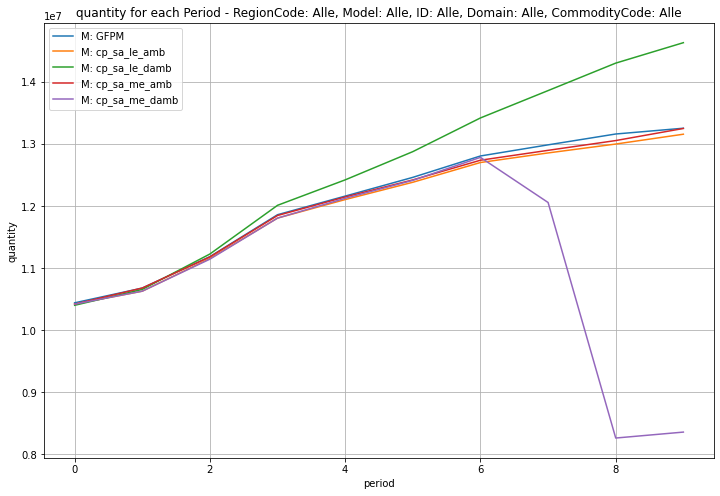

In [18]:
class PlotDropDown:
    def __init__(self,data): 
        self.data =data
        self.regioncode_dropdown = self.choose_dropdown("RegionCode")
        self.model_dropdown = self.choose_dropdown("Model")
        self.id_dropdown = self.choose_dropdown("ID")
        self.domain_dropdown = self.choose_dropdown("domain")
        self.commodity_code_dropdown = self.choose_dropdown("CommodityCode")

        self.interactive_plot_update = interactive(
            self.update_plot_data,
            region = self.regioncode_dropdown,
            model = self.model_dropdown,
            id = self.id_dropdown,
            domain= self.domain_dropdown,
            commodity = self.commodity_code_dropdown)
        
       
        display(self.interactive_plot_update)


    def choose_dropdown(self, column):
        options = ['Alle'] + list(self.data[column].unique())
        return widgets.Dropdown(
            options=options,
            value='Alle',
            description=f'Select {column}:',
            disabled=False
        )

    def update_plot_data(self, region, model, id, domain, commodity):
        region_filter = [region] if region != 'Alle' else self.data['RegionCode'].unique()
        model_filter = [model] if model != 'Alle' else self.data['Model'].unique()
        id_filter = [id] if id != 'Alle' else self.data['ID'].unique()
        domain_filter = [domain] if domain != 'Alle' else self.data['domain'].unique()
        commodity_filter = [commodity] if commodity != 'Alle' else self.data['CommodityCode'].unique()


        filtered_data = self.data[
            (self.data['RegionCode'].isin(region_filter)) &
            (self.data['Model'].isin(model_filter)) &
            (self.data['ID'].isin(id_filter)) &
            (self.data['domain'].isin(domain_filter)) &
            (self.data['CommodityCode'].isin(commodity_filter))
        ]
    
        grouped_data = filtered_data.groupby(['Period', 'Scenario']).sum().reset_index()

        plt.figure(figsize=(12, 8))

        for price_value in grouped_data['Scenario'].unique():
            subset = grouped_data[grouped_data['Scenario'] == price_value]
            plt.plot(subset['Period'], subset['quantity'], label=f'M: {price_value}')

        plt.title(f'quantity for each Period - RegionCode: {region}, Model: {model}, ID: {id}, Domain: {domain}, CommodityCode: {commodity}')
        plt.xlabel('period')
        plt.ylabel('quantity')
        plt.legend()
        plt.grid(True)
        plt.show()
    

plot_dropdown_instance = PlotDropDown(data)

plot_dropdown_instance.update_plot_data(
    region=plot_dropdown_instance.regioncode_dropdown.value,
    model=plot_dropdown_instance.model_dropdown.value,
    id=plot_dropdown_instance.id_dropdown.value,
    domain=plot_dropdown_instance.domain_dropdown.value,
    commodity=plot_dropdown_instance.commodity_code_dropdown.value)


### Interactive scenario results (prices)

In [21]:
#Dropdown
region_dropdown = widgets.Dropdown(
    options=['Alle'] + list(data['RegionCode'].unique()),
    value='Alle',
    description='Select RegionCode:',
    disabled=False,
)

model_dropdown = widgets.Dropdown(
    options=['Alle'] + list(data['Model'].unique()),
    value='Alle',
    description='Select Model:',
    disabled=False,
)

id_dropdown = widgets.Dropdown(
    options=['Alle'] + list(data['ID'].unique()),
    value='Alle',
    description='Select ID:',
    disabled=False,
)

domain_dropdown = widgets.Dropdown(
    options=['Alle'] + list(data['domain'].unique()),
    value='Alle',
    description='Select Domain:',
    disabled=False,
)

commodity_code_dropdown = widgets.Dropdown(
    options=['Alle'] + list(data['CommodityCode'].unique()),
    value='Alle',
    description='Select CommodityCode:',
    disabled=False,
)

output_plot = widgets.Output()

output_table = widgets.Output()

def update_plot_data(region_code, model, id_value, domain, commodity_code):
    region_code_filter = [region_code] if region_code != 'Alle' else data['RegionCode'].unique()
    model_filter = [model] if model != 'Alle' else data['Model'].unique()
    id_filter = [id_value] if id_value != 'Alle' else data['ID'].unique()
    domain_filter = [domain] if domain != 'Alle' else data['domain'].unique()
    commodity_code_filter = [commodity_code] if commodity_code != 'Alle' else data['CommodityCode'].unique()

    filtered_data = data[
        (data['RegionCode'].isin(region_code_filter)) &
        (data['Model'].isin(model_filter)) &
        (data['ID'].isin(id_filter)) &
        (data['domain'].isin(domain_filter)) &
        (data['CommodityCode'].isin(commodity_code_filter))
    ]
    
    grouped_data = filtered_data.groupby(['Period', 'Scenario']).sum().reset_index()

    with output_plot:
        clear_output(wait=True)
        plt.figure(figsize=(12, 8))
        bar_width = 0.2
        for i, scenario_value in enumerate(grouped_data['Scenario'].unique()):
            subset = grouped_data[grouped_data['Scenario'] == scenario_value]
            x_positions = subset['Period'] + i * bar_width
            plt.bar(x_positions, subset['price'], width=bar_width, label=f'Scenario {scenario_value}')

        plt.title(f'Price for each scenario grouped by Period - RegionCode: {region_code}, Model: {model}, ID: {id_value}, Domain: {domain}, CommodityCode: {commodity_code}')
        plt.xlabel('Period')
        plt.ylabel('Price')
        plt.legend()
        plt.grid(True)
        plt.show()

#show Table of selected drop down  
    with output_table:
        clear_output(wait=True)
        display_table = filtered_data[['Period', 'RegionCode', 'Model', 'ID', 'domain', 'CommodityCode', 'Scenario', 'quantity', 'price']] 
        display(display_table)

interactive_plot_update = widgets.interactive(
    update_plot_data,
    region_code=region_dropdown,
    model=model_dropdown,
    id_value=id_dropdown,
    domain=domain_dropdown,
    commodity_code=commodity_code_dropdown
)

def update_outputs(*args):
    update_plot_data(region_dropdown.value, model_dropdown.value, id_dropdown.value, domain_dropdown.value, commodity_code_dropdown.value)

region_dropdown.observe(update_outputs, 'value')
model_dropdown.observe(update_outputs, 'value')
id_dropdown.observe(update_outputs, 'value')
domain_dropdown.observe(update_outputs, 'value')
commodity_code_dropdown.observe(update_outputs, 'value')

display(region_dropdown, model_dropdown, id_dropdown, domain_dropdown, commodity_code_dropdown)
#display(interactive_plot_update)
display(widgets.HBox([output_plot, output_table]))


Dropdown(description='Select RegionCode:', options=('Alle', 'a0', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a…

Dropdown(description='Select Model:', options=('Alle', 'GFPMpt', 'GFPM'), value='Alle')

Dropdown(description='Select ID:', options=('Alle', 1, 0, 2, 3, 4), value='Alle')

Dropdown(description='Select Domain:', options=('Alle', 'Demand', 'TransportationExport', 'TransportationImpor…

Dropdown(description='Select CommodityCode:', options=('Alle', 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91,…